##### Title: Monitoring how RTT varies based on the geolocation of the target
##### Author: Lotito Davide Pio
##### Date: 
<img src="./images/logoUnipvST.jpg" width="75" height="75">

## Some useful imports

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
from glob import glob
import getCoordinate
import haversine as hs
import math

## Read all files and create a unique dataframe 

In [21]:
dirPath = '../results/'
allFiles = glob(os.path.join(dirPath, "*.txt"))
indDf = (pd.read_json(f) for f in allFiles)
df = pd.concat(indDf, ignore_index=True)
df.drop('time', axis=1, inplace=True)
df

,destination,date,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT
0,34.71.44.40,2022-04-18,0%,9013ms,129.369,132.916,144.675,4.565
1,35.236.81.238,2022-04-18,0%,9011ms,170.274,172.740,178.484,2.788
2,34.74.209.9,2022-04-18,0%,9010ms,116.419,120.695,140.447,6.895
3,34.151.215.105,2022-04-18,0%,9011ms,218.832,222.232,239.276,5.926
4,34.129.235.109,2022-04-18,0%,9010ms,291.306,292.996,298.187,1.961
...,...,...,...,...,...,...,...,...
295,34.85.87.24,2022-04-18,0%,9011ms,247.994,262.270,335.731,25.178
296,34.131.76.108,2022-04-18,0%,9010ms,274.681,286.609,358.669,24.408
297,34.101.215.255,2022-04-18,0%,9010ms,266.289,280.166,350.840,23.988
298,34.88.168.220,2022-04-18,0%,9012ms,54.037,60.711,76.667,7.981


## Sort in ascending order by RTT

## Coordinate degli IP

In [22]:
IP_list = df['destination'].tolist()
IP_list = list(dict.fromkeys(IP_list)) #remove duplicated elements

## Plottare posizione sulla mappa degli IP

My IP is: 34.71.44.40 and my coordinates are POINT (-97 37)
My IP is: 35.236.81.238 and my coordinates are POINT (-118 34)
My IP is: 34.74.209.9 and my coordinates are POINT (-79 32)
My IP is: 34.151.215.105 and my coordinates are POINT (-46 -23)
My IP is: 34.129.235.109 and my coordinates are POINT (144 -37)
My IP is: 34.85.87.24 and my coordinates are POINT (139 35)
My IP is: 34.131.76.108 and my coordinates are POINT (77 28)
My IP is: 34.101.215.255 and my coordinates are POINT (106 -6)
My IP is: 34.88.168.220 and my coordinates are POINT (28 61)
My IP is: 34.65.88.164 and my coordinates are POINT (8 47)


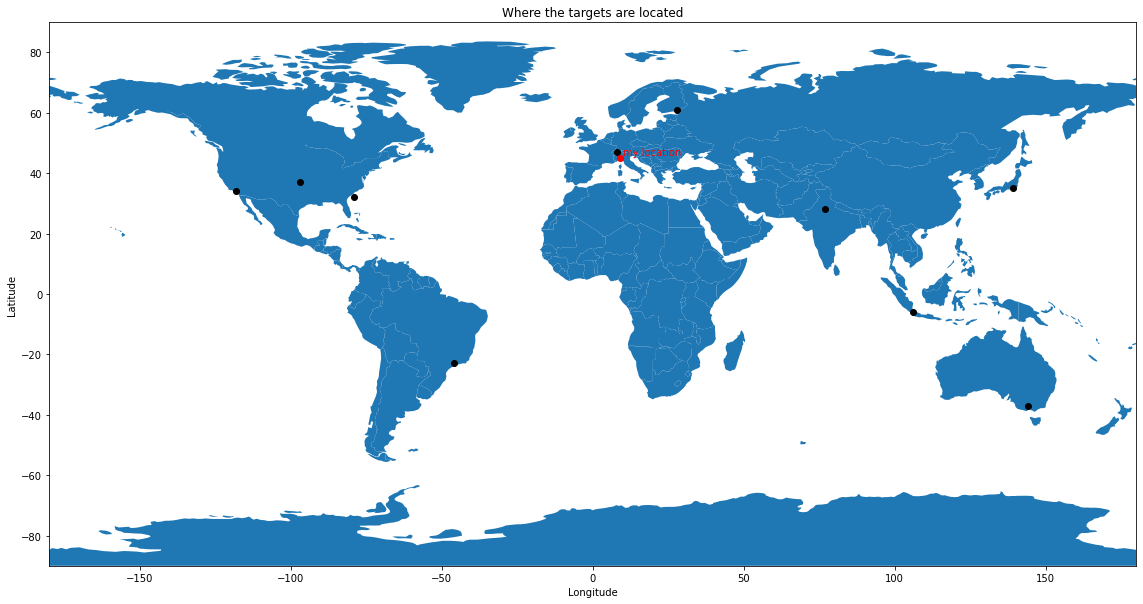

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

points = gpd.GeoDataFrame() # Point(longitudine, latitudine)

my_points = {}
for ip in IP_list:
    point = Point(getCoordinate.coordinates(ip))
    os.system("sleep 1")# wait because of the free-API
    #my_points.append(point)
    my_points[ip] = point

# API does not get
my_points["34.151.215.105"] = (Point(-46,-23))
my_points["34.129.235.109"] = (Point(144,-37))
my_points["34.131.76.108"] = (Point(77,28))

for ip, loc in my_points.items():
    print(f"My IP is: {ip} and my coordinates are {loc}")

points["geometry"] = gpd.GeoSeries(my_points)
ax = world.plot()
points.plot(color="k", ax=ax)

my_point = Point(9, 45)
my_location = gpd.GeoSeries(my_point)
my_location.plot(color="r", ax=ax)

plt.text(my_point.x+1,my_point.y+1,"my location", color='red')
plt.rcParams["figure.figsize"] = (25, 10)
plt.title("Where the targets are located")
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Calcolare distanza tra la mia posizione e IP target

Aggiungo le coordinate ad ogni IP

In [24]:
for ip, loc in my_points.items():
    lines = (df[df["destination"] == ip])
    for ind in lines.index:
        df.at[ind, 'Longitude'] = loc.x
        df.at[ind, 'Latitude'] = loc.y

Calcolo della distanza e aggiungo il valore ad ogni riga

In [25]:
for ind in df.index:
    d = hs.haversine((my_point.y, my_point.x),(df.at[ind, 'Latitude'], df.at[ind, 'Longitude'])) #lat, long
    df.at[ind, 'distance'] = d

In [26]:
df.head(50)

,destination,date,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT,Longitude,Latitude,distance
0,34.71.44.40,2022-04-18,0%,9013ms,129.369,132.916,144.675,4.565,-97.0,37.0,8266.499645
1,35.236.81.238,2022-04-18,0%,9011ms,170.274,172.740,178.484,2.788,-118.0,34.0,9735.979278
2,34.74.209.9,2022-04-18,0%,9010ms,116.419,120.695,140.447,6.895,-79.0,32.0,7416.074669
3,34.151.215.105,2022-04-18,0%,9011ms,218.832,222.232,239.276,5.926,-46.0,-23.0,9388.279066
4,34.129.235.109,2022-04-18,0%,9010ms,291.306,292.996,298.187,1.961,144.0,-37.0,16187.205013
5,34.85.87.24,2022-04-18,0%,9013ms,246.619,250.518,268.296,6.517,139.0,35.0,9795.623299
6,34.131.76.108,2022-04-18,0%,9011ms,271.798,274.697,282.878,3.803,77.0,28.0,6175.643452
7,34.101.215.255,2022-04-18,0%,9013ms,267.380,268.732,273.726,1.811,106.0,-6.0,11028.836276
8,34.88.168.220,2022-04-18,0%,9013ms,53.305,56.276,62.898,3.516,28.0,61.0,2169.385795
9,34.65.88.164,2022-04-18,0%,9011ms,18.556,20.080,26.915,2.348,8.0,47.0,235.417010


## Ordinare per distanza minore

In [32]:
df = df.sort_values(['distance']).reset_index(drop=True)
df

,destination,date,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT,Longitude,Latitude,distance
0,34.65.88.164,2022-04-18,0%,9012ms,17.901,19.987,24.809,1.946,8.0,47.0,235.417010
1,34.65.88.164,2022-04-18,0%,9013ms,17.597,25.050,81.361,18.819,8.0,47.0,235.417010
2,34.65.88.164,2022-04-18,0%,9013ms,17.703,23.751,52.961,9.885,8.0,47.0,235.417010
3,34.65.88.164,2022-04-18,0%,9013ms,17.394,20.778,30.402,4.866,8.0,47.0,235.417010
4,34.65.88.164,2022-04-18,0%,9011ms,18.289,20.488,25.647,2.526,8.0,47.0,235.417010
...,...,...,...,...,...,...,...,...,...,...,...
295,34.129.235.109,2022-04-18,0%,9009ms,290.789,294.421,304.632,4.231,144.0,-37.0,16187.205013
296,34.129.235.109,2022-04-18,0%,9009ms,291.041,302.057,368.995,22.396,144.0,-37.0,16187.205013
297,34.129.235.109,2022-04-18,0%,9011ms,290.869,305.149,406.196,33.916,144.0,-37.0,16187.205013
298,34.129.235.109,2022-04-18,0%,9012ms,294.166,295.968,300.704,1.905,144.0,-37.0,16187.205013


In [34]:
IP_list = list(dict.fromkeys(df['destination'].tolist()))

## Grafici

Si mostrano i valori di RTT ('avgRTT') raggruppati per IP 

Text(0, 0.5, 'rtt time [ms]')

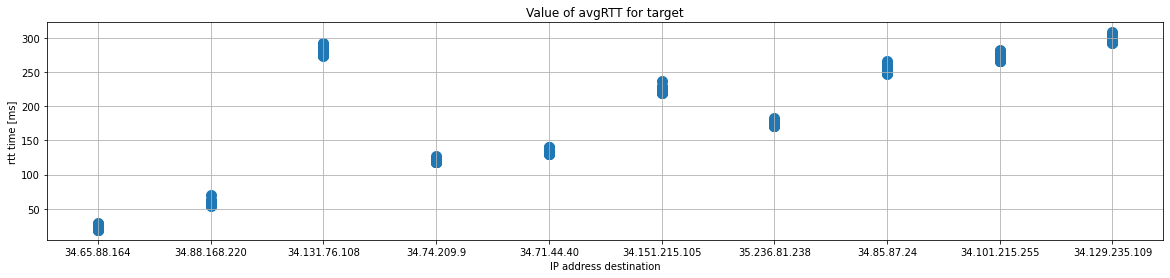

In [38]:
df.plot.scatter(x = 'destination', y = 'avgRTT', s = 100)
plt.grid()
plt.rcParams["figure.figsize"] = (20, 4)
plt.title("Value of avgRTT for target")
plt.xlabel("IP address destination")
plt.ylabel("rtt time [ms]")

Mostrare come con il crescere della distanza, cresca anche l'RTT (o almeno così dovrebbe accadere)

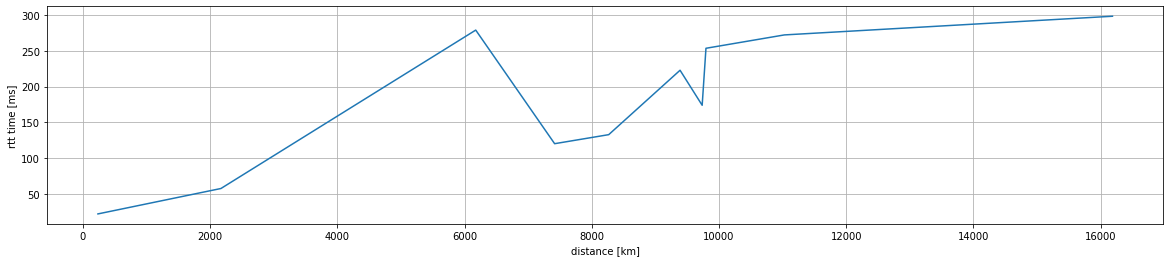

In [31]:
df.groupby("distance").avgRTT.mean().plot()
plt.xlabel("distance [km]")
plt.ylabel("rtt time [ms]")
plt.grid()
plt.rcParams["figure.figsize"] = (14, 7)
# df.plot.scatter(x = 'distance', y = 'avgRTT', s = 100)
# plt.title("How RTT change with distance")
# plt.xlabel("distance [km]")
# plt.ylabel("rtt time [ms]")